# 1. Introduction

### Project Goal

### Dataset Description 

###  Main Research Questions / Hypotheses

# 2. Loading the Dataset

In [1]:
#Importing libraires

from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [2]:
data_zip = ZipFile("C:\\Users\\beltr\\Documents\\Data Analysis\\Porftolio\\archive.zip")
data_zip.filelist

[<ZipInfo filename='Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv' compress_type=deflate file_size=24137 compress_size=2390>]

In [3]:
data = data_zip.open('Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df = pd.read_csv(data)

# 3. Data Overview

In [5]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
df.sample()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
294,295,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea


In [8]:
df.shape

(374, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [10]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# 4. EDA

### Missing and Duplicated

In [11]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [12]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [13]:
df.duplicated().sum()

0

### Data Cleaning

In [14]:
df[['Diastolic_BP', 'Sistolic_BP']] = df['Blood Pressure'].str.split('/', expand =True).astype(int)

In [15]:
df.drop(columns = ['Blood Pressure'],inplace = True)

In [16]:
df_clean = df.copy()

# 5. UNIVARIATE ANALYSIS

### Numerical Variables

In [17]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Diastolic_BP', 'Sistolic_BP'],
      dtype='object')

In [18]:
num_var = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Daily Steps',
           'Diastolic_BP','Sistolic_BP']

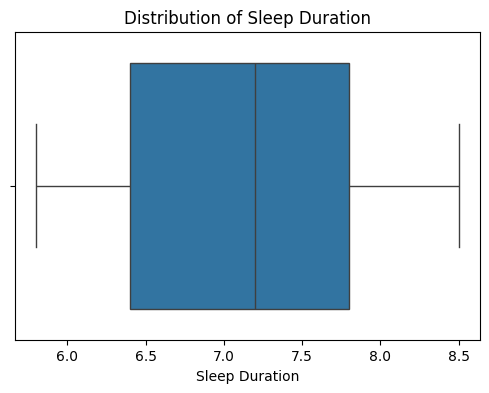

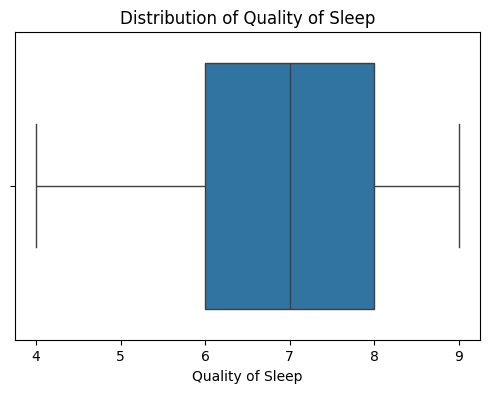

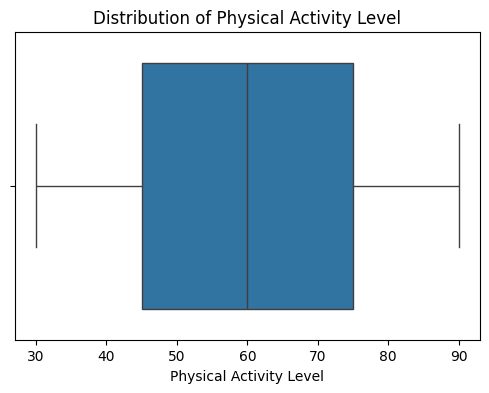

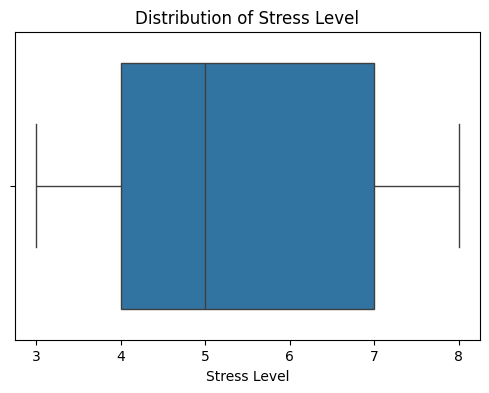

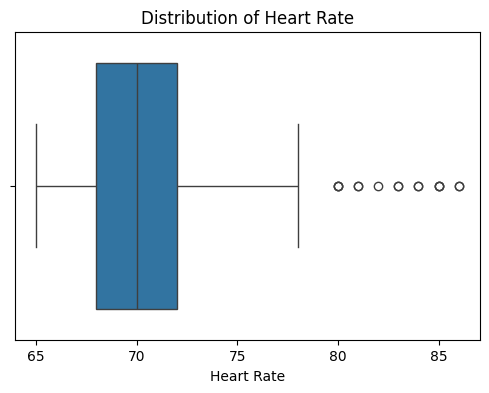

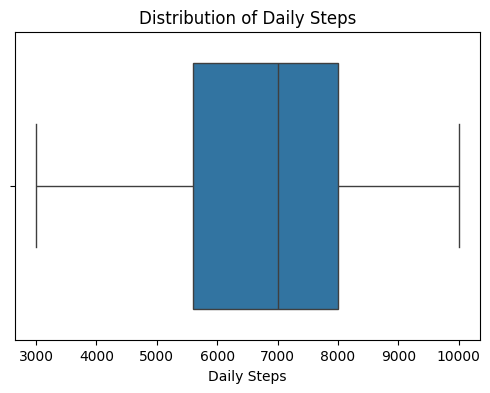

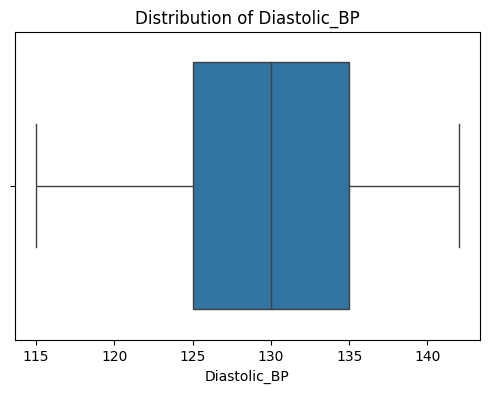

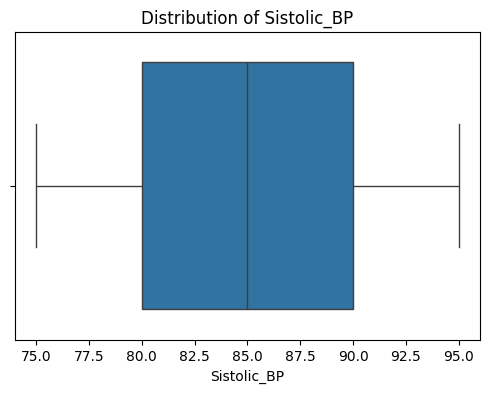

In [19]:
for var in num_var:
    plt.figure(figsize=(6,4))
    sns.boxplot(data = df, x = var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.show()

In [20]:
cat_var = ['Occupation', 'BMI Category', 'Sleep Disorder']

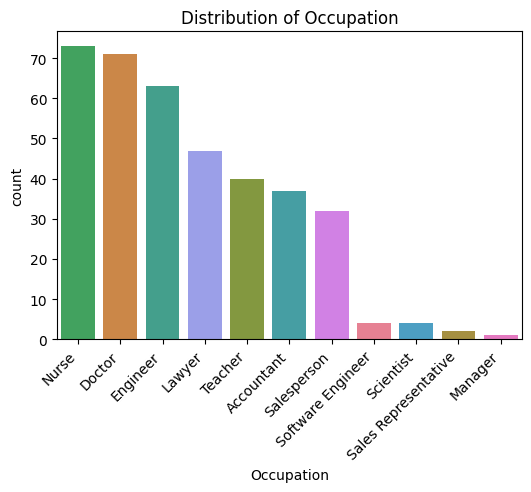

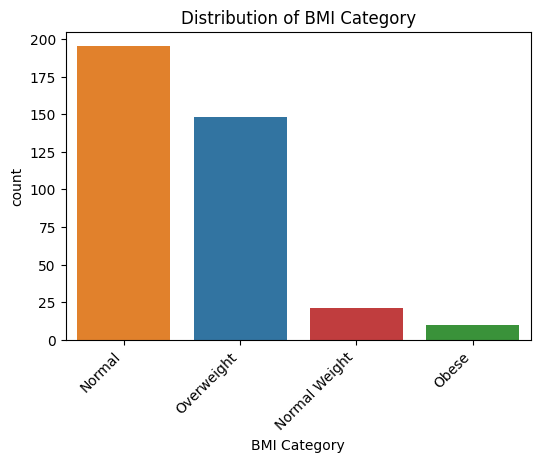

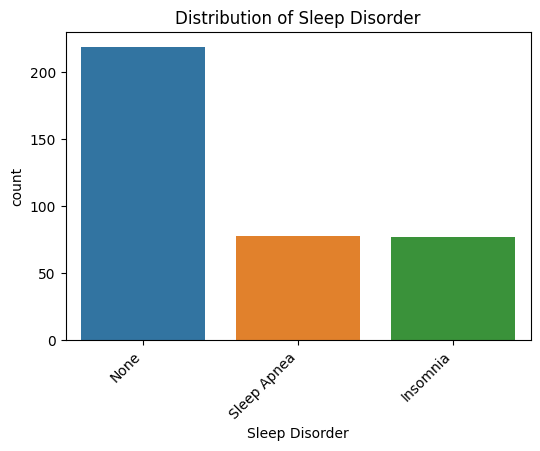

In [21]:
for var in cat_var:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x = var,order=df[var].value_counts().index, hue = var)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45, horizontalalignment ='right')
    plt.show()

# 6. BIVARIATE ANALYSIS

### Is physical activity associated with better sleep quality?


In [22]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

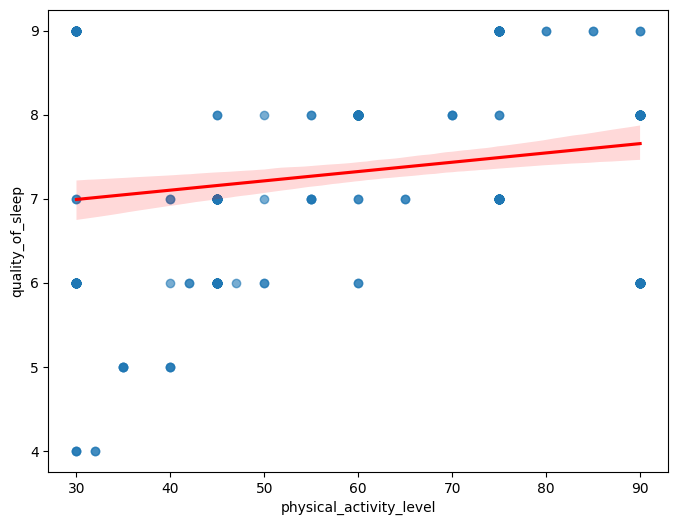

In [23]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='physical_activity_level',
    y='quality_of_sleep',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

plt.show()

In [24]:
formula = 'quality_of_sleep ~ physical_activity_level'

In [25]:
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       quality_of_sleep   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     14.38
Date:                Tue, 20 May 2025   Prob (F-statistic):           0.000175
Time:                        02:06:35   Log-Likelihood:                -590.33
No. Observations:                 374   AIC:                             1185.
Df Residuals:                     372   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.6570      0.183     36.307      0.000       6.296       7.018
physical_activity_level     0.0111      0.003      3.792      0.000       0.005       0.017
==============================================================================
Omnibus:                       19.171   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.103
Skew:                          -0.044   Prob(JB):                       0.0174
Kurtosis:                       2.284   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Do individuals with longer sleep duration report lower stress levels?

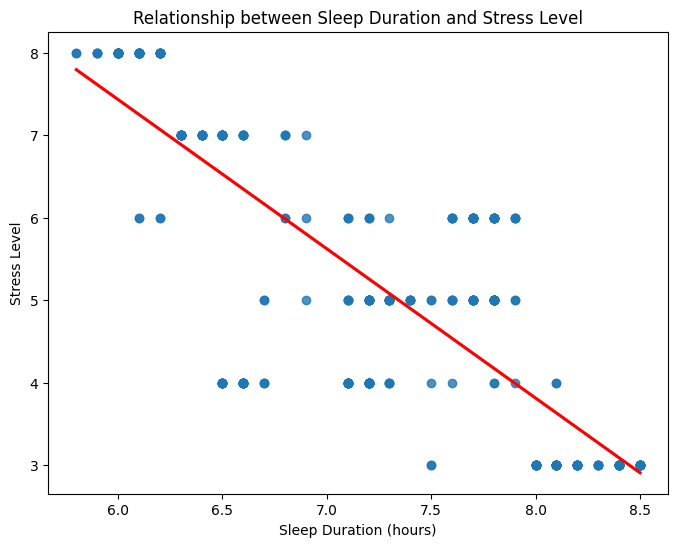

In [26]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, 
            x='sleep_duration', 
            y='stress_level', 
            line_kws={'color': 'red'}, 
            ci=None
)
plt.title("Relationship between Sleep Duration and Stress Level")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Stress Level")

plt.show()

In [27]:
formula = 'stress_level ~ sleep_duration'

In [28]:
model = smf.ols(formula=formula, data=df).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           stress_level   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     715.0
Date:                Tue, 20 May 2025   Prob (F-statistic):           1.24e-88
Time:                        02:06:35   Log-Likelihood:                -544.18
No. Observations:                 374   AIC:                             1092.
Df Residuals:                     372   BIC:                             1100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.2855      0.485     37.667      0.000      17.331      19.240
sleep_duration    -1.8088      0.068    -26.739      0.000      -1.942      -1.676
==============================================================================
Omnibus:                       19.546   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.608
Skew:                          -0.589   Prob(JB):                     2.03e-05
Kurtosis:                       3.002   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Are there differences in sleep habits across different BMI categories?

In [30]:
df.columns

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'heart_rate', 'daily_steps', 'sleep_disorder',
       'diastolic_bp', 'sistolic_bp'],
      dtype='object')

In [31]:
df['bmi_category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [32]:
df["bmi_category"] = df["bmi_category"].replace("Normal Weight", "Normal")

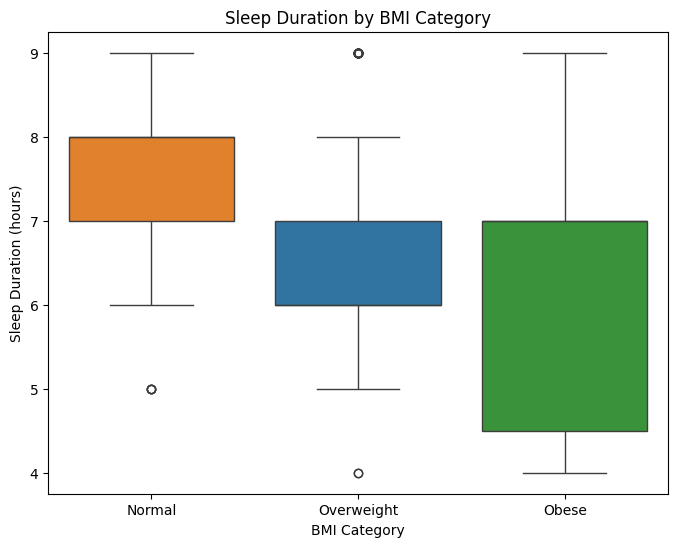

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,
    x="bmi_category",
    y="quality_of_sleep",
    order=["Normal", "Overweight", "Obese"],
    hue = 'bmi_category'
)
plt.title("Sleep Duration by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Sleep Duration (hours)")
plt.show()

In [34]:
model = smf.ols(formula = 'quality_of_sleep ~ C(bmi_category)', data = df).fit()

In [35]:
sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(bmi_category),2.0,56.685333,28.342666,22.011391,9.257969e-10
Residual,371.0,477.713063,1.287636,NaN,NaN


In [36]:
tukey_oneway = pairwise_tukeyhsd(endog = df['quality_of_sleep'], groups = df['bmi_category'], alpha = 0.05)

In [37]:
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Normal,Obese,-1.2389,0.0023,-2.1026,-0.3752,True
Normal,Overweight,-0.7402,0.0,-1.0252,-0.4553,True
Obese,Overweight,0.4986,0.3712,-0.3738,1.3711,False


### Is there a relationship between heart rate and sleep quality?


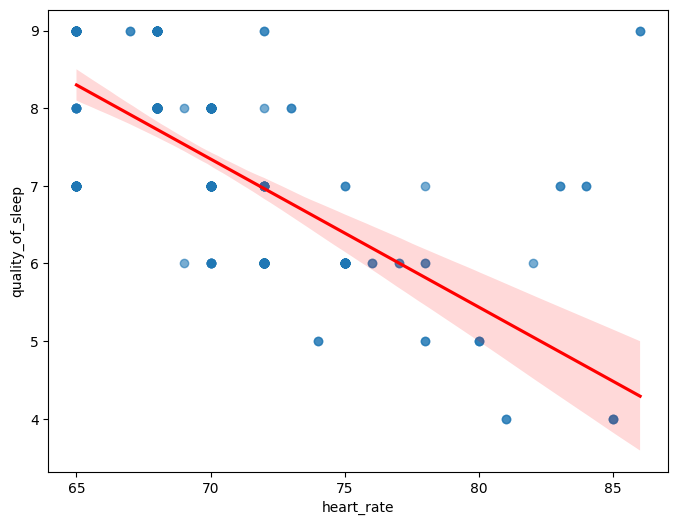

In [38]:
plt.figure(figsize=(8,6))
sns.regplot(data = df,
            x = 'heart_rate', 
            y = 'quality_of_sleep',
            scatter_kws = {'alpha' : 0.6},
            line_kws = {'color':'red'}
                          
)
plt.show()

In [39]:
formula = 'quality_of_sleep ~ heart_rate'

In [40]:
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       quality_of_sleep   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     286.9
Date:                Tue, 20 May 2025   Prob (F-statistic):           4.13e-48
Time:                        02:06:35   Log-Likelihood:                -490.52
No. Observations:                 374   AIC:                             985.0
Df Residuals:                     372   BIC:                             992.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7131      0.792     26.136      0.000      19.155      22.271
heart_rate    -0.1910      0.011    -16.938      0.000      -0.213      -0.169
==============================================================================
Omnibus:                       63.358   Durbin-Watson:                   0.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.131
Skew:                           0.824   Prob(JB):                     1.69e-35
Kurtosis:                       5.750   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Is there a relationship between BMI category and the presence of sleep disorders?

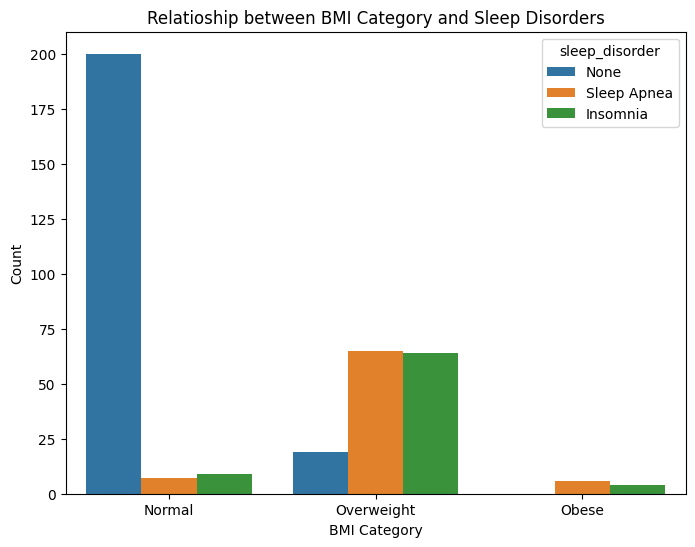

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(
    data = df,
    x = 'bmi_category',
    hue = 'sleep_disorder',
    order=['Normal', 'Overweight', 'Obese']
)

plt.title('Relatioship between BMI Category and Sleep Disorders')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

In [42]:
contingency_table = pd.crosstab(df['bmi_category'], df['sleep_disorder'])
contingency_table

sleep_disorder,Insomnia,None,Sleep Apnea
bmi_category,,,
Normal,9,200,7
Obese,4,0,6
Overweight,64,19,65


In [43]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 statistic: {chi2:.4f}')
print(f'Degrees of freedom: {dof}')
print(f'P-value: {p:.6f}')

Chi2 statistic: 245.6653
Degrees of freedom: 4
P-value: 0.000000


# 7. KEY INSIGHTS

#  8. CONCLUSIONS